In [1]:
from mlgrad import sfunc, erm_fg, erm_fg_rud
from mlgrad.func import Square
from mlgrad.regular import Rosenbrok, Himmelblau
from mlgrad.loss import ErrorLoss

import numpy as np
import matplotlib.pyplot as plt

In [2]:
ff = Rosenbrok()
extent = [-2.0,2.0,-1.0,3.0]
param_init = [-1.9,2.]

def generate_dataset():
    X1 = np.linspace(-2.0, 2.0, 100)
    X2 = np.linspace(-1.0, 3.0, 100)
    XX1, XX2 = np.meshgrid(X1, X2)
    xx = np.c_[XX1.ravel(), XX2.ravel()]
    Y = [ff(x) for x in xx]
    Y = np.array(Y)
    return Y, xx, Y.reshape(XX1.shape)

In [3]:
Y, X, YY = generate_dataset()

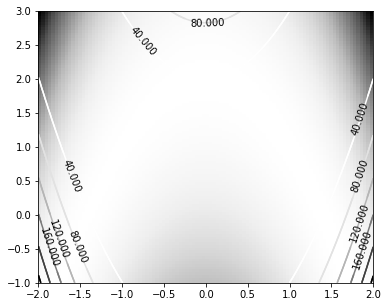

In [4]:
plt.figure(figsize=(6,5))
cb = plt.imshow(YY, extent=extent, aspect='auto', cmap=plt.cm.Greys)
ct=plt.contour(YY, extent=extent, cmap=plt.cm.Greys)
#plt.colorbar(cb)
ct = plt.contour(YY, extent=extent, cmap=plt.cm.Greys)
plt.clabel(ct, colors='k')
plt.show()

In [5]:
er1 = sfunc(ff)
er1.param = np.array(param_init)

d1={'param':[er1.param.base.copy()]}
def log_param1(alg, d=d1):
    d1['param'].append(np.array(alg.risk.param))

alg1 = erm_fg_rud(er1, callback=log_param1, h=0.085, tol=1.0e-8, n_iter=10000)
print(alg1.K, np.asarray(alg1.risk.param))

2868 [0.99593287 0.99187094]


In [6]:
er2 = sfunc(ff)
er2.param = np.array(param_init)

d2={'param':[er2.param.base.copy()]}
def log_param2(alg, d=d2):
    d2['param'].append(np.array(alg.risk.param))

alg2 = erm_fg_rud(er2, callback=log_param2, h=0.1, tol=1.0e-8, n_iter=10000, averager='AdaM1')
print(alg2.K, np.asarray(alg2.risk.param))

1115 [1.00006998 1.00013933]


In [7]:
er3 = sfunc(ff)
er3.param = np.array(param_init)

d3={'param':[er3.param.base.copy()]}
def log_param3(alg, d=d3):
    d3['param'].append(np.array(alg.risk.param))

alg3 = erm_fg_rud(er3, callback=log_param3, h=0.15, tol=1.0e-8, n_iter=10000, averager='AdaM2')
print(alg3.K, np.asarray(alg3.risk.param))

963 [0.99989617 0.99979063]


In [8]:
er4 = sfunc(ff)
er4.param = np.array(param_init)

d4={'param':[er4.param.base.copy()]}
def log_param4(alg, d=d4):
    d4['param'].append(np.array(alg.risk.param))
alg4 = erm_fg_rud(er4, callback=log_param4, h=0.007, tol=1.0e-8, n_iter=20000, averager='Mom')
print(alg4.K, np.asarray(alg4.risk.param))

1393 [0.9958458  0.99169219]


In [9]:
er41 = sfunc(ff)
er41.param = np.array(param_init)

d41={'param':[er41.param.base.copy()]}
def log_param41(alg, d=d41):
    d41['param'].append(np.array(alg.risk.param))
alg41 = erm_fg_rud(er41, callback=log_param41, h=0.06, tol=1.0e-8, n_iter=20000, averager='AMom')
print(alg41.K, np.asarray(alg41.risk.param))

1778 [0.99550492 0.991012  ]


In [23]:
er5 = sfunc(ff)
er5.param = np.array(param_init)

d5={'param':[er5.param.base.copy()]}
def log_param5(alg, d=d5):
    d5['param'].append(np.array(alg.risk.param))

alg5 = erm_fg_rud(er5, callback=log_param5, h=0.001, tol=1.0e-8, n_iter=20000, averager='RMS')
print(alg5.K, np.asarray(alg5.risk.param))

7160 [0.93124864 0.86699051]


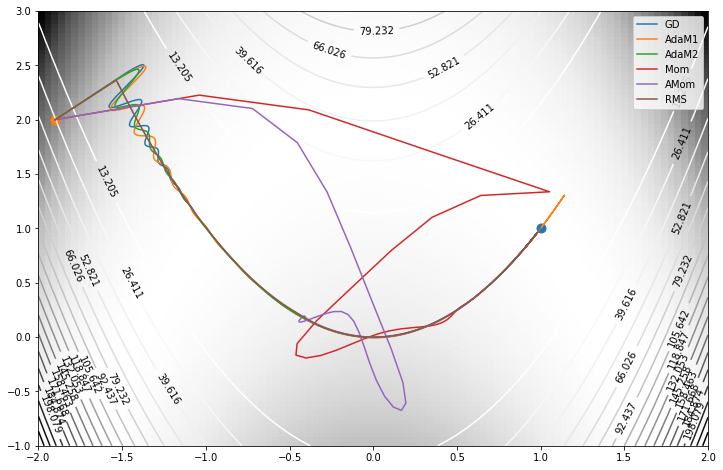

In [22]:
plt.figure(figsize=(12,8))
params1 = np.array(d1['param'])
params2 = np.array(d2['param'])
params3 = np.array(d3['param'])
params4 = np.array(d4['param'])
params41 = np.array(d41['param'])
params5 = np.array(d5['param'])
plt.plot(params1[:,0], params1[:,1], label='GD')
plt.plot(params2[:,0], params2[:,1], label='AdaM1')
plt.plot(params3[:,0], params3[:,1], label='AdaM2')
plt.plot(params4[:,0], params4[:,1], label='Mom')
plt.plot(params41[:,0], params41[:,1], label='AMom')
plt.plot(params5[:,0], params5[:,1], label='RMS')
levels = np.linspace(YY.min(), YY.max(), 20)
plt.imshow(YY, extent=extent, aspect='auto', cmap=plt.cm.Greys)
ct = plt.contour(YY, extent=extent, levels=levels, cmap=plt.cm.Greys)
plt.clabel(ct, colors='k')
plt.scatter([1],[1], s=81)
plt.scatter([param_init[0]],[param_init[1]], s=81)
plt.legend()
plt.show()